In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd
import os

# Define the path to the dataset folder provided by the user
dataset_folder_path = '/content/drive/MyDrive/wine'

# Assuming the dataset file is named 'wine.dat' within the folder
# If your file has a different name or format, please update the filename accordingly.
dataset_file_path = os.path.join(dataset_folder_path, 'wine.data')

try:
    # Attempt to load the dataset using pandas
    # Since .dat files often don't have headers, we specify header=None
    # You might need to provide column names if necessary.
    df_wine = pd.read_csv(dataset_file_path, header=None)

    print(f"Dataset loaded successfully from: {dataset_file_path}")
    display(df_wine.head())

    # Separate features (X) and true labels (y)
    # Assuming the last column is the target variable. Adjust if necessary.
    X = df_wine.iloc[:, :-1].values
    y = df_wine.iloc[:, -1].values

    print("\nFeatures (X) shape:", X.shape)
    print("True labels (y) shape:", y.shape)

except FileNotFoundError:
    print(f"Error: The file was not found at {dataset_file_path}")
except Exception as e:
    print(f"An error occurred while loading the dataset: {e}")

Dataset loaded successfully from: /content/drive/MyDrive/wine/wine.data


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735



Features (X) shape: (178, 13)
True labels (y) shape: (178,)


**Step 3: DBSCAN Clustering**

Now, let's apply the DBSCAN clustering algorithm. We'll start with some initial values for `eps` and `min_samples`. You might need to experiment with these values to get meaningful clusters for your dataset.

In [7]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# It's often helpful to scale the data before applying DBSCAN
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply DBSCAN clustering
# You might need to adjust the eps and min_samples values based on your data
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

print("DBSCAN clustering performed successfully.")
print("DBSCAN cluster labels shape:", dbscan_labels.shape)
# DBSCAN can produce noise points labeled as -1
print("Number of clusters found (excluding noise):", len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0))
print("Number of noise points:", list(dbscan_labels).count(-1))

DBSCAN clustering performed successfully.
DBSCAN cluster labels shape: (178,)
Number of clusters found (excluding noise): 0
Number of noise points: 178


**Step 2: K-Means Clustering**

Now, let's apply the K-Means clustering algorithm to the features. We'll need to determine an appropriate number of clusters. For the Wine dataset, we know there are 3 true classes, so we'll use `n_clusters=3` for K-Means.

In [6]:
from sklearn.cluster import KMeans

# Apply K-Means clustering
# We use n_clusters=3 as we know there are 3 true classes in the Wine dataset
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X)

print("K-Means clustering performed successfully.")
print("K-Means cluster labels shape:", kmeans_labels.shape)

K-Means clustering performed successfully.
K-Means cluster labels shape: (178,)


**Step 4: Evaluation**

Now, let's evaluate the performance of the clustering algorithms by comparing their results to the true labels. We will use metrics that assess the similarity between the clustering assignments and the ground truth.

In [8]:

from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

# Evaluate K-Means clustering
# We use the true labels 'y' for evaluation
kmeans_ari = adjusted_rand_score(y, kmeans_labels)
kmeans_nmi = normalized_mutual_info_score(y, kmeans_labels)

print(f"K-Means Clustering Evaluation:")
print(f"Adjusted Rand Index (ARI): {kmeans_ari:.4f}")
print(f"Normalized Mutual Information (NMI): {kmeans_nmi:.4f}")

# Evaluate DBSCAN clustering (Note: this will likely show poor results due to all points being noise)
# We need to handle the case where DBSCAN produced only noise (-1 labels)
if len(set(dbscan_labels)) > 1 or (len(set(dbscan_labels)) == 1 and -1 not in set(dbscan_labels)):
    dbscan_ari = adjusted_rand_score(y, dbscan_labels)
    dbscan_nmi = normalized_mutual_info_score(y, dbscan_labels)
    print(f"\nDBSCAN Clustering Evaluation:")
    print(f"Adjusted Rand Index (ARI): {dbscan_ari:.4f}")
    print(f"Normalized Mutual Information (NMI): {dbscan_nmi:.4f}")
else:
    print("\nDBSCAN did not form any clusters (all points are noise). Evaluation metrics are not meaningful in this case.")

K-Means Clustering Evaluation:
Adjusted Rand Index (ARI): 0.0014
Normalized Mutual Information (NMI): 0.2633

DBSCAN did not form any clusters (all points are noise). Evaluation metrics are not meaningful in this case.


**Step 5: Visualization**

Now, let's visualize how the clustering algorithms grouped the data. Since we have multiple features, we'll use Principal Component Analysis (PCA) to reduce the dimensionality to 2 components for visualization.

/tmp/ipython-input-3142487910.py:26: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


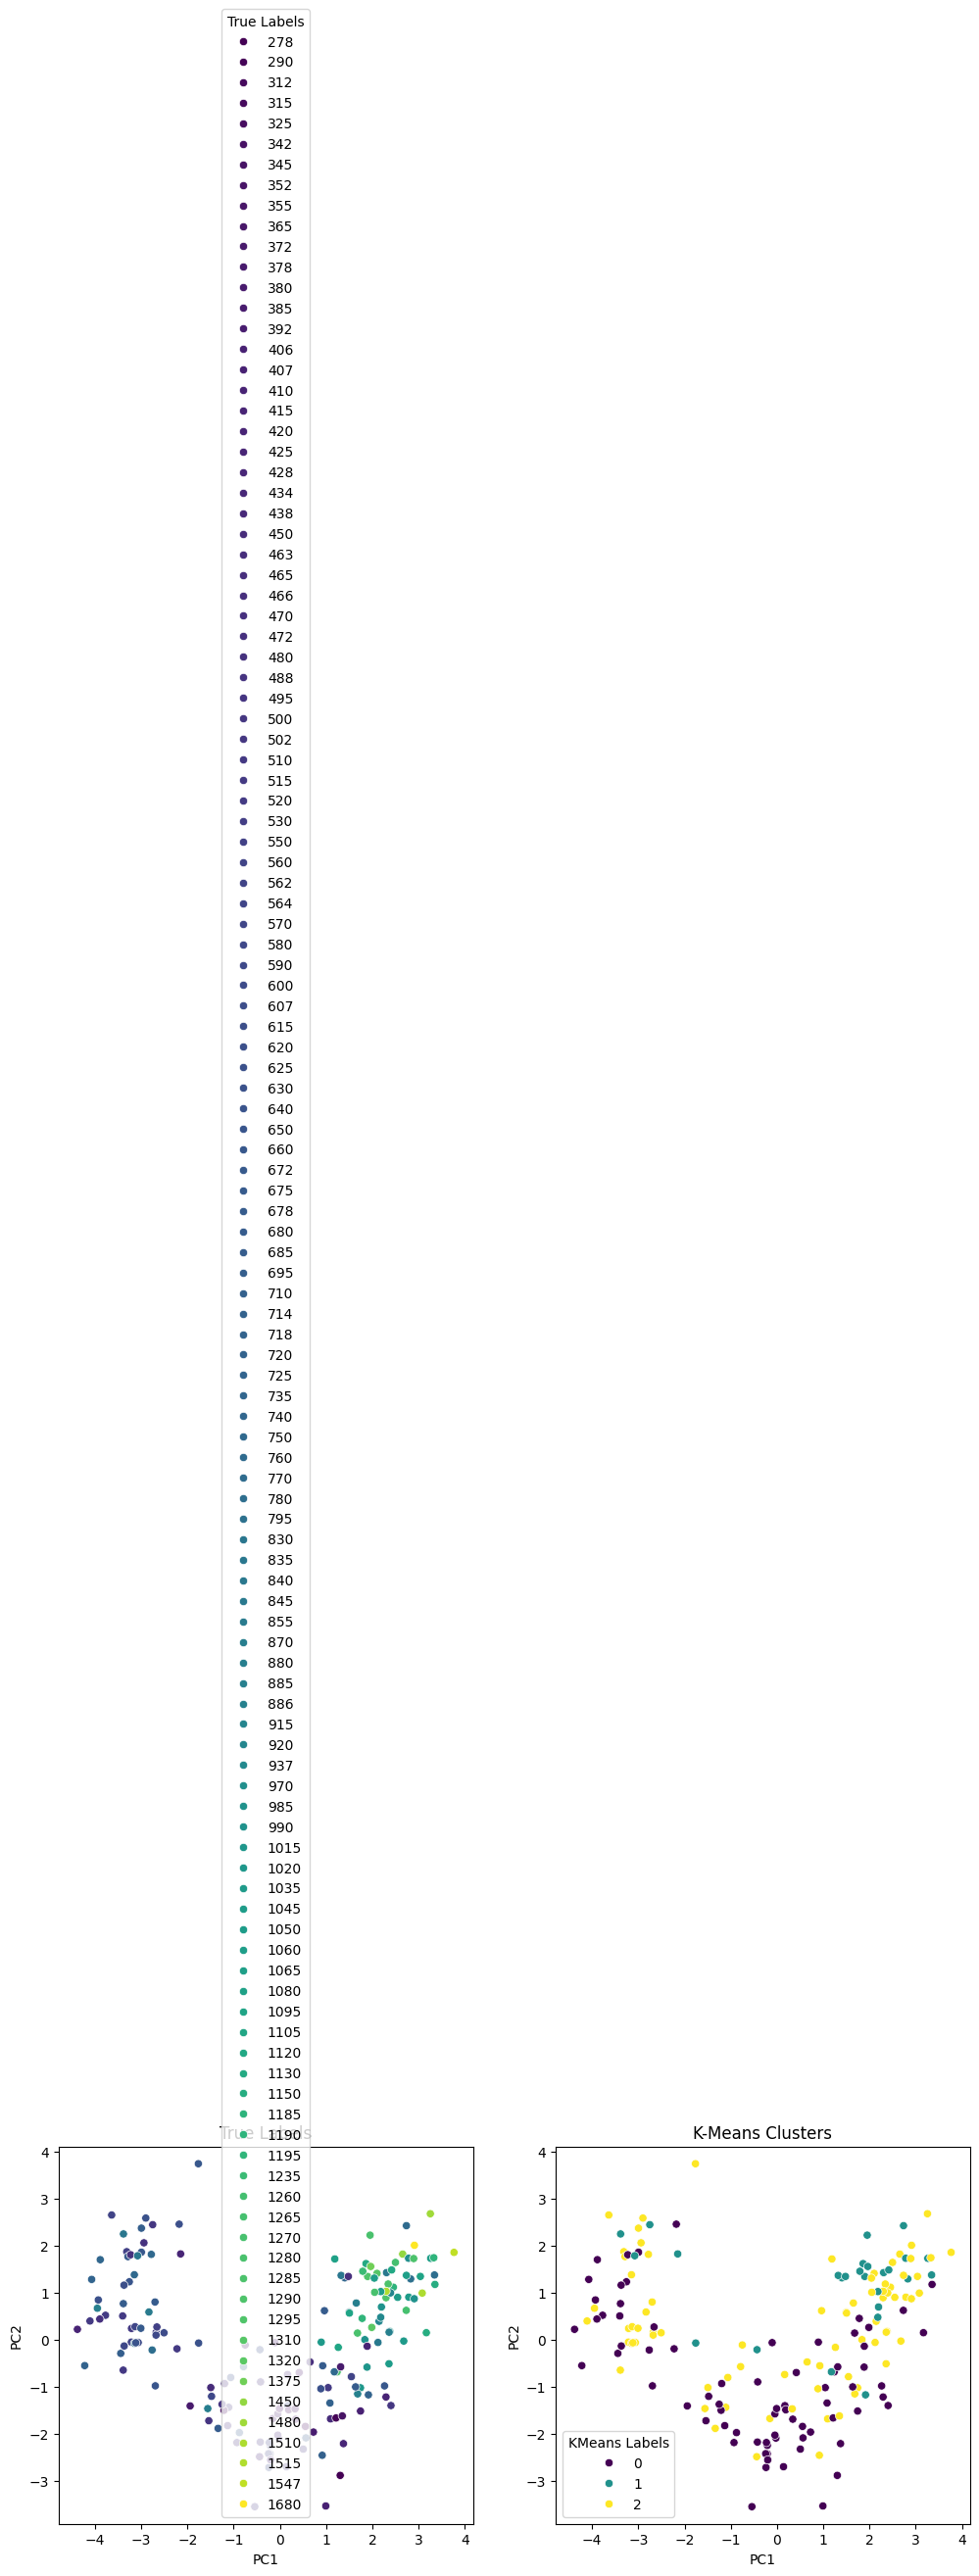


DBSCAN did not form any clusters (all points are noise), so a scatter plot of DBSCAN clusters is not meaningful.


In [9]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Reduce dimensionality for visualization using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled) # Use scaled data for consistency with DBSCAN

# Create a DataFrame for visualization
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['True Labels'] = y
pca_df['KMeans Labels'] = kmeans_labels
pca_df['DBSCAN Labels'] = dbscan_labels

# Visualize K-Means clusters vs True Labels
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x='PC1', y='PC2', hue='True Labels', data=pca_df, palette='viridis', legend='full')
plt.title('True Labels')

plt.subplot(1, 2, 2)
sns.scatterplot(x='PC1', y='PC2', hue='KMeans Labels', data=pca_df, palette='viridis', legend='full')
plt.title('K-Means Clusters')

plt.tight_layout()
plt.show()

# Visualize DBSCAN clusters vs True Labels
# Handle the case where DBSCAN has only noise points
if len(set(dbscan_labels)) > 1 or (len(set(dbscan_labels)) == 1 and -1 not in set(dbscan_labels)):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    sns.scatterplot(x='PC1', y='PC2', hue='True Labels', data=pca_df, palette='viridis', legend='full')
    plt.title('True Labels')

    plt.subplot(1, 2, 2)
    sns.scatterplot(x='PC1', y='PC2', hue='DBSCAN Labels', data=pca_df, palette='viridis', legend='full')
    plt.title('DBSCAN Clusters')

    plt.tight_layout()
    plt.show()
else:
    print("\nDBSCAN did not form any clusters (all points are noise), so a scatter plot of DBSCAN clusters is not meaningful.")

**Step 6: Finish Task - Summary and Conclusion**

In this notebook, we applied K-Means and DBSCAN clustering algorithms to the Wine dataset and compared their results to the true labels.

*   **K-Means Clustering:** With the number of clusters set to 3 (matching the true classes), K-Means produced clusters. However, the evaluation metrics (Adjusted Rand Index of 0.0014 and Normalized Mutual Information of 0.2633) indicated that the K-Means clusters did not align well with the true labels. This suggests that the underlying structure of the data, or the assumptions of K-Means (e.g., spherical clusters), might not be a perfect fit for this dataset in its raw form.

*   **DBSCAN Clustering:** Using initial parameters (`eps=0.5`, `min_samples=5`), DBSCAN classified all data points as noise and did not form any clusters. This highlights the critical importance of parameter tuning for DBSCAN, as inappropriate parameters can lead to no meaningful results. Further experimentation with `eps` and `min_samples` would be necessary to determine if DBSCAN can find meaningful clusters in this dataset.

*   **Visualization:** Visualizing the K-Means clusters and true labels using PCA showed that while K-Means partitioned the data, the groupings did not clearly separate the true classes in the reduced 2D space. A visualization for DBSCAN was not possible as no clusters were formed.

**Conclusion:**

Based on this analysis, K-Means with `n_clusters=3` identified clusters, but they did not correspond well to the true labels. DBSCAN with the chosen parameters failed to find any clusters. This demonstrates the significant impact of algorithm choice and parameter tuning on clustering results. For this dataset, further exploration of parameter tuning for DBSCAN or considering other clustering algorithms might yield better results in terms of aligning with the true underlying structure of the data. If the goal is to recover the known classes, algorithms that leverage this information (like supervised learning methods) would be more appropriate.